## Single reflection event

In [1]:
import monte_carlo_simulation as mcs
import time
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import geo.caustic_frame as caustic_frame
import monte_carlo_simulation as mcs
from bandstructure.delafossite_bandstructure import delafossite

In [2]:
k = delafossite(40)
bar_frame = caustic_frame.Frame('geo/bar.dxf')
field = 1.0
phi = 0
n_inject = 1
np.random.seed(42)
simulation = mcs.Simulation(bar_frame, k, phi, field, 0)

In [6]:
edge = bar_frame.edges[4] 
initial_position = [0.25, -4.95]
#initial_position = [0.8, 3]
initial_n_f = [22, 0.7]
print(f'initial: {[initial_n_f, initial_position]}')

projected_n_f, projected_x, projected_y = simulation._update_position(initial_n_f, initial_position[0], initial_position[1])
print(f'projected: {[projected_n_f, projected_x, projected_y]}')

step_coords = ([(initial_position[0], initial_position[1]), (projected_x, projected_y)])
print(f'step_coords: {step_coords}')
intersection = simulation._get_sorted_intersections(step_coords)[0]
print(f'intersection: {intersection}')
intersection_x = intersection[1]
intersection_y = intersection[2]
n_f_int = simulation._get_n_f_intersection(initial_n_f, [(initial_position[0], initial_position[1]), (intersection_x, intersection_y), (projected_x, projected_y)])
print(f'n_f_int: {n_f_int}')

final_n_f = simulation._specular(n_f_int, edge)
post_n_f, final_x, final_y = simulation._update_position(final_n_f, intersection_x, intersection_y)
print(f'final: {final_n_f} {final_x} {final_y}')

initial: [[22, 0.7], [0.25, -4.95]]
projected: [(23, 1), -0.37234385186540453, -5.313779461083998]
step_coords: [(0.25, -4.95), (-0.37234385186540453, -5.313779461083998)]
intersection: (((0.5, -5.0), (-0.5, -5.0), 1), 0.16446138143934697, -4.9999999999495355, 0.09908004471243655)
n_f_int: (22, 0.13744591242327)
final: (16, 0.291113834294107) -0.09435705422622642 -4.848712523158669


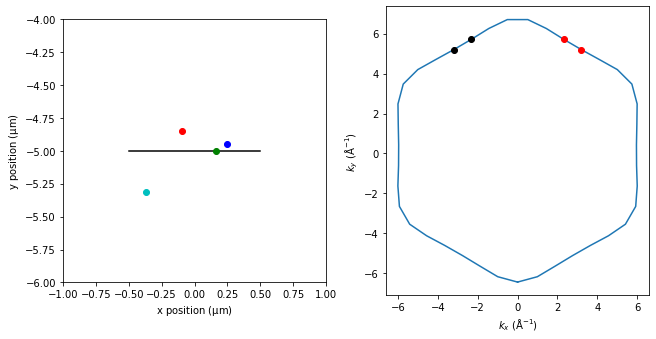

In [8]:
plt.rcParams['figure.figsize'] = [9, 5]
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

plt.subplot(1, 2, 1)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-6, -4)
x, y = [edge.xs, edge.ys]
plt.plot(x, y, color='k')
plt.xlabel(r'x position ($\mathrm{\mu m}$)')
plt.ylabel(r'y position ($\mathrm{\mu m}$)')
plt.plot([initial_position[0]], [initial_position[1]], 'bo')
plt.plot(intersection_x, intersection_y, 'go')
plt.plot(projected_x, projected_y, 'co')
plt.plot(final_x, final_y, 'ro')
ax1.set_aspect('equal')

plt.subplot(1, 2, 2)
plt.plot(simulation._bandstructure.r[0], simulation._bandstructure.r[1])
plt.xlabel(r'$k_x\ (\mathrm{\AA^{-1}})$')
plt.ylabel(r'$k_y\ (\mathrm{\AA^{-1}})$')
plt.plot(simulation._bandstructure.r[0][initial_n_f[0]], simulation._bandstructure.r[1][initial_n_f[0]], color='black', linestyle='dashdot', marker='o')
plt.plot(simulation._bandstructure.r[0][initial_n_f[0]+1], simulation._bandstructure.r[1][initial_n_f[0]+1], color='black', linestyle='dashdot', marker='o')
plt.plot(simulation._bandstructure.r[0][final_n_f[0]], simulation._bandstructure.r[1][final_n_f[0]], color='red', linestyle='dashdot', marker='o')
plt.plot(simulation._bandstructure.r[0][final_n_f[0]+1], simulation._bandstructure.r[1][final_n_f[0]+1], color='red', linestyle='dashdot', marker='o')
ax2.set_aspect('equal')